In [52]:
# import the necessary packages
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2
from matplotlib import pyplot as plt
 
def midpoint(ptA, ptB):
    return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)
 

In [53]:
# load the image, convert it to grayscale, and blur it slightly
img = cv2.imread('pDataSet/detected/_tmp/00000001.jpg')
cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [54]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0)
gray = cv2.equalizeHist(gray)

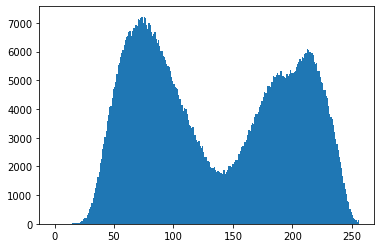

In [55]:
hist = cv2.calcHist([gray],[0],None,[256],[0,256])
plt.hist(img.ravel(),256,[0,256]); plt.show()

In [56]:
thresh1 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
cv2.imshow("Image", thresh1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [57]:
# perform edge detection, then perform a dilation + erosion to
# close gaps in between object edges
edged = cv2.Canny(gray, 50, 100)
#edged = cv2.dilate(edged, None, iterations=1)
#edged = cv2.erode(edged, None, iterations=1)
cv2.imshow("Image", edged)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [58]:
# find contours in the edge map
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
 
# sort the contours from left-to-right and initialize the
# 'pixels per metric' calibration variable
(cnts, _) = contours.sort_contours(cnts)
screenCnt = None

In [59]:
filter = []
print(len(cnts))
for c in cnts:
    if cv2.contourArea(c) > 500:
        filter.append(c)
print(len(filter))

1588
3


In [60]:
cv2.drawContours(img, filter, -1, (0, 255, 0), 3)
cv2.imshow("Poo", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [48]:
# loop over our contours
for c in cnts:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.015 * peri, True)
 
    # if our approximated contour has four points, then
    # we can assume that we have found our screen
    if len(approx) == 4:
        screenCnt = approx
        break

In [49]:
cv2.drawContours(img, [screenCnt], -1, (0, 255, 0), 3)
cv2.imshow("Poo", img)
cv2.waitKey(0)
cv2.destroyAllWindows()